In [551]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

from gensim.models import Word2Vec
from nltk.corpus import stopwords
from statistics import mean
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [504]:
import warnings
warnings.filterwarnings('ignore')

* [Model](#model)
* [Methods](#eval)
* [Data Testing](#testing)
* [Visuals](#visuals)

## Model <a class="anchor" id="model"></a>

In [108]:
all_df = pd.read_pickle("/home/dgilberg/nlp_partisanship/data/all_committees.pkl")
all_df["Release"] = all_df.apply(lambda row: row["Release"].strip(), axis=1)
df = all_df[mask]

In [357]:
df["Quarter"] = df.apply(lambda row: get_quarter(row["Month"]), axis=1)
df

/home/dgilberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Committee,Date,Day,Label,Month,Party,Release,Title,Year,Bipartisan_Score,Crisis_Score,Quarter
0,Agriculture,2017-11-09,9,"Democratic, Agriculture",11,Democratic,WASHINGTON – U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017,-0.319077,-0.123864,Q4
1,Agriculture,2017-11-02,2,"Democratic, Agriculture",11,Democratic,"WASHINGTON - Today, U.S. Senator Debbie Staben...",Statement from Ranking Member Stabenow on the ...,2017,-0.760380,-0.128293,Q4
2,Agriculture,2017-11-01,1,"Democratic, Agriculture",11,Democratic,"WASHINGTON – Today, U.S. Senator Debbie Staben...",Ranking Member Stabenow Asks Clovis about his ...,2017,-0.445458,-0.110107,Q4
3,Agriculture,2017-10-18,18,"Democratic, Agriculture",10,Democratic,"WASHINGTON, D.C. – Today, U.S. Senator Debbie ...",Stabenow Offers Budget Amendment to Protect th...,2017,-0.304266,-0.191782,Q4
4,Agriculture,2017-10-17,17,"Democratic, Agriculture",10,Democratic,Improvements to the successful Regional Conser...,"Stabenow, Ernst Introduce Bipartisan Bill to S...",2017,0.175095,-0.029527,Q4
5,Agriculture,2017-10-05,5,"Democratic, Agriculture",10,Democratic,WASHINGTON – U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017,-0.273190,-0.171565,Q4
6,Agriculture,2017-09-28,28,"Democratic, Agriculture",9,Democratic,"WASHINGTON – U.S. Senator Debbie Stabenow, Ran...",Ranking Member Stabenow Highlights Economic Im...,2017,-0.125338,-0.168378,Q3
7,Agriculture,2017-09-19,19,"Democratic, Agriculture",9,Democratic,WASHINGTON – U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017,-0.334682,-0.135319,Q3
8,Agriculture,2017-09-14,14,"Democratic, Agriculture",9,Democratic,"WASHINGTON – U.S. Senator Debbie Stabenow, Ran...",Ranking Member Stabenow Opening Statement at H...,2017,-0.240403,-0.216946,Q3
9,Agriculture,2017-08-31,31,"Democratic, Agriculture",8,Democratic,"WASHINGTON – Today, U.S. Senator Debbie Staben...",Ranking Member Stabenow Applauds New MPP Flexi...,2017,0.164231,0.011503,Q3


In [359]:
by_party_and_quarter = df.groupby(["Committee", "Party", "Year", "Quarter"], as_index=False)["Release"].agg(lambda col: " ".join(col))

In [453]:
by_quarter_party = df.groupby(["Committee", "Party", "Year", "Quarter"], as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
by_quarter_party = by_quarter_party.rename(columns={"Day": "Count"})

In [3]:
test_rel = list(all_df["Release"])
en_stop = stopwords.words('english') + ['.', ',', '(', ')', "'", '"', "-", "!", "!!", "!!!", "...", "|"]


# list for tokenized documents in loop
test_words = []

# loop through document list
for line in test_rel:
    # clean and tokenize document string
    raw = line.lower()
    tokens = nltk.wordpunct_tokenize(raw)
    
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    
    #add to list
    test_words.append(stopped_tokens)

In [4]:
model = Word2Vec(test_words,size=100, window=5, min_count=1, workers=2,sg=1)

In [336]:
model.most_similar("partisan")

[('bickering', 0.7571538686752319),
 ('partisanship', 0.7470159530639648),
 ('rancor', 0.7232846021652222),
 ('cameral', 0.7128742933273315),
 ('pandering', 0.7114010453224182),
 ('bi', 0.6930221915245056),
 ('gamesmanship', 0.6896706223487854),
 ('obstructionism', 0.6828084588050842),
 ('hyper', 0.6721944212913513),
 ('ploy', 0.6687057614326477)]

## Evaluation Methods <a class="anchor" id="eval"></a>

In [ ]:
# urgent_set = ["urgent", "pressing", "confront", "crisis", "confrontation"]
# crisis_set = ["crisis", "catastrophe"]
# bipartisan_set = ["bipartisan", "bicameral", "together"]
# target = "This was a tough process"
# target_arr = target.split(" ")
# count = 0
# for target in target_arr:
#     try:
#         count += mean([test_mod.similarity (target, w) for w in bipartisan_set])
#     except:
#         pass
# #scale = mean([test_mod.similarity(target, w) for w in free_set]) - mean([test_mod.similarity(target, w) for w in neg_set])
# #scale
# count/len(target_arr)

#### Bipartisanship

In [817]:
def get_bipartisan_score(rel):

    rel = rel.replace("\n", " ")
    arr = rel.split(" ")
    final = 0
    counter = 0
    bipartisan_set = ["bipartisan", "bicameral", "together", "unified", "cooperation", 
                      "coalition", "union", "collaboration"
                     ]
    partisan_set = ["partisan", "bickering", "obstruction", "cameral", "gamesmanship",
                   "conspiracy", "disagreement", "gridlock"]
    for word in arr:
        try:
            scale = mean([model.similarity(word, w) for w in bipartisan_set]) - mean([model.similarity(word, w) for w in partisan_set])
            final+= scale
            counter += 1
        except:
            final=final
    if counter ==0:
        return 0
    else:
        return (final/counter) *10

In [818]:
def get_partisan_score(rel):

    rel = rel.replace("\n", " ")
    arr = rel.split(" ")
    final = 0
    counter = 0
    bipartisan_set = ["bipartisan", "bicameral", "together", "unified", "cooperation", 
                      "coalition", "union", "collaboration"
                     ]
    partisan_set = ["partisan", "bickering", "obstruction", "cameral", "gamesmanship",
                   "conspiracy", "disagreement", "gridlock"]
    for word in arr:
        try:
            scale = mean([model.similarity(word, w) for w in partisan_set]) - mean([model.similarity(word, w) for w in bipartisan_set])
            final+= scale
            counter += 1
        except:
            final=final
    if counter ==0:
        return 0
    else:
        return (final/counter) *10

In [819]:
df["Partisan_Score"] = df.apply(lambda row: get_partisan_score(row["Release"]), axis=1)

In [520]:
get_bipartisan_score("It was great working alongside each other")

-0.40165730918229148

In [521]:
get_bipartisan_score("We're very disappointed in this unilateral action")

0.83180992848806601

In [261]:
def get_crisis_score(rel):
    #print(rel)
    
    rel = rel.replace("\n", " ")
    arr = rel.split(" ")
    final = 0
    counter = 0
    crisis_set = ["urgent", "crisis", "worrisome", "pessimistic", "alarming"]
    peaceful_set = ["calm", "agreement", "peaceful", "optimistic", "understandable"]
    for word in arr:
        try:
            scale = mean([model.similarity(word, w) for w in peaceful_set]) - mean([model.similarity(word, w) for w in crisis_set])
            final+= scale
            counter += 1
        except:
            final=final
    
    if counter ==0:
        return 0
    else:
        return (final/counter) * 10

In [245]:
def get_happiness_score(rel):
    #print(rel)
    
    rel = rel.replace("\n", " ")
    arr = rel.split(" ")
    final = 0
    counter = 0
    happy_set = ["excited", "enthusiastic", "thrilled", "wonderful", "proud"]
    angry_set = ["saddened", "upset", "peaceful", "angered", "outraged"]
    for word in arr:
        try:
            scale = sum([model.similarity(word, w) for w in happy_set]) - sum([model.similarity(word, w) for w in angry_set])
            final+= scale
            counter += 1
        except:
            final=final
    
    if counter ==0:
        return 0
    else:
        return final

In [354]:
def get_quarter(month):
    months = list(range(1,13))
    quarters = [1,1,1,2,2,2,3,3,3,4,4,4]
    d = dict(zip(months,quarters))
    try:
        return "Q" + str(d[month])
    except:
        return ''

## Test <a class="anchor" id="testing"></a>

In [332]:
model.most_similar("partisan", topn=50)

[('bickering', 0.7571538686752319),
 ('partisanship', 0.7470159530639648),
 ('rancor', 0.7232846021652222),
 ('cameral', 0.7128742933273315),
 ('pandering', 0.7114010453224182),
 ('bi', 0.6930221915245056),
 ('gamesmanship', 0.6896706223487854),
 ('obstructionism', 0.6828084588050842),
 ('hyper', 0.6721944212913513),
 ('ploy', 0.6687057614326477),
 ('futility', 0.6676005125045776),
 ('brinkmanship', 0.6616989374160767),
 ('gridlock', 0.660015881061554),
 ('zonal', 0.6597433090209961),
 ('summon', 0.658592700958252),
 ('scorekeeper', 0.6581727266311646),
 ('slamdown', 0.6509133577346802),
 ('politics', 0.6498285531997681),
 ('pander', 0.6466521620750427),
 ('temper', 0.6427372694015503),
 ('fray', 0.642728328704834),
 ('germane', 0.6408843994140625),
 ('parochial', 0.6402013301849365),
 ('bitterness', 0.6398980021476746),
 ('divisive', 0.6384652853012085),
 ('sideshow', 0.6338301301002502),
 ('battleground', 0.6322386264801025),
 ('sequel', 0.6309240460395813),
 ('divided', 0.6300606727

In [213]:
test = all_df.iloc[1298]["Release"]
#test = all_df[all_df["Title"].str.contains("Iran")].iloc[-50]["Release"]

test = temp.iloc[-300]
test

Committee                                                    Commerce
Date                                              2016-02-18 00:00:00
Day                                                                18
Label                                            Republican, Commerce
Month                                                               2
Party                                                      Republican
Release             WASHINGTON – U.S. Sen. Deb Fischer (R-Neb.), c...
Title               Commerce Announces Subcommittee Hearing on Pas...
Year                                                             2016
Bipartisan_Score                                             0.156617
Name: 3908, dtype: object

In [258]:
test = temp.iloc[-5000]["Release"]
test

"WASHINGTON – Homeland Security and Governmental Affairs Committee Chairman Joe Lieberman, ID-Conn., and Ranking Member Susan Collins, R-Me., Thursday asked the Government Accountability Office (GAO) to update its report on which foreign nations are violating Iran sanctions. The request comes at the first anniversary of GAO’s last report on the topic, which found seven countries in violation of the sanctions passed by Congress last year. According to CRS, the Administration sanctioned two of those countries and exempted the other five. Following is the Senators’ letter to GAO:May 18, 2011The Honorable Gene L. DodaroComptroller General of the United StatesGovernment Accountability Office441 G Street, NWWashington, D.C., 20548Dear Mr. Dodaro:     It has been one year since you issued a report entitled Firms Reported in Open Sources as Having Commercial Activity in Iran’s Oil, Gas, and Petrochemical Sectors.  This report identified seven foreign firms that had investments in Iran’s energy

In [259]:
get_bipartisan_score(test)

-0.31580716710372331

In [114]:
df["Bipartisan_Score"] = df.apply(lambda row: get_bipartisan_score(row["Release"]), axis=1)

/home/dgilberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
df["Crisis_Score"] = df.apply(lambda row: get_crisis_score(row["Release"]), axis=1)

/home/dgilberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
df1 = df
df1["Bipartisan_Score"] = df1.apply(lambda row: get_bipartisan_score(row["Release"]), axis=1)

/home/dgilberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [231]:
df1.sort_values("Bipartisan_Score").iloc[100]

Committee                                                 Environment
Date                                              2007-11-08 00:00:00
Day                                                                 8
Label                                         Democratic, Environment
Month                                                              11
Party                                                      Democratic
Release             November 8, 2007\n(Remarks as delivered on the...
Title               Floor Remarks of Senator Barbara Boxer on the ...
Year                                                             2007
Bipartisan_Score                                            -0.615875
Crisis_Score                                                -0.112987
Name: 12931, dtype: object

In [169]:
crisis = df.sort_values("Crisis_Score")

In [260]:
df

,Committee,Date,Day,Label,Month,Party,Release,Title,Year,Bipartisan_Score,Crisis_Score
0,Agriculture,2017-11-09,9,"Democratic, Agriculture",11,Democratic,WASHINGTON – U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017,-0.319077,-0.123864
1,Agriculture,2017-11-02,2,"Democratic, Agriculture",11,Democratic,"WASHINGTON - Today, U.S. Senator Debbie Staben...",Statement from Ranking Member Stabenow on the ...,2017,-0.760380,-0.128293
2,Agriculture,2017-11-01,1,"Democratic, Agriculture",11,Democratic,"WASHINGTON – Today, U.S. Senator Debbie Staben...",Ranking Member Stabenow Asks Clovis about his ...,2017,-0.445458,-0.110107
3,Agriculture,2017-10-18,18,"Democratic, Agriculture",10,Democratic,"WASHINGTON, D.C. – Today, U.S. Senator Debbie ...",Stabenow Offers Budget Amendment to Protect th...,2017,-0.304266,-0.191782
4,Agriculture,2017-10-17,17,"Democratic, Agriculture",10,Democratic,Improvements to the successful Regional Conser...,"Stabenow, Ernst Introduce Bipartisan Bill to S...",2017,0.175095,-0.029527
5,Agriculture,2017-10-05,5,"Democratic, Agriculture",10,Democratic,WASHINGTON – U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017,-0.273190,-0.171565
6,Agriculture,2017-09-28,28,"Democratic, Agriculture",9,Democratic,"WASHINGTON – U.S. Senator Debbie Stabenow, Ran...",Ranking Member Stabenow Highlights Economic Im...,2017,-0.125338,-0.168378
7,Agriculture,2017-09-19,19,"Democratic, Agriculture",9,Democratic,WASHINGTON – U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017,-0.334682,-0.135319
8,Agriculture,2017-09-14,14,"Democratic, Agriculture",9,Democratic,"WASHINGTON – U.S. Senator Debbie Stabenow, Ran...",Ranking Member Stabenow Opening Statement at H...,2017,-0.240403,-0.216946
9,Agriculture,2017-08-31,31,"Democratic, Agriculture",8,Democratic,"WASHINGTON – Today, U.S. Senator Debbie Staben...",Ranking Member Stabenow Applauds New MPP Flexi...,2017,0.164231,0.011503


In [188]:
len(temp)/4

4307.0

In [262]:
temp.iloc[5000]

Committee                                                     Finance
Date                                              2013-04-23 00:00:00
Day                                                                23
Label                                             Republican, Finance
Month                                                               4
Party                                                      Republican
Release             WASHINGTON – U.S. Senator Orrin Hatch (R-Utah)...
Title               Hatch Statement on Max Baucus Not Seeking Re-E...
Year                                                             2013
Bipartisan_Score                                            -0.158379
Name: 5852, dtype: object

## DF groupbys<a class="anchor" id="groups"></a>

In [285]:
by_year = df.groupby(["Committee", "Party", "Year"], as_index=False)["Release"].agg(lambda col: " ".join(col))
by_year_count = df.groupby(["Committee", "Party", "Year"], as_index=False).agg({"Day": len})
test = by_year.iloc[1]["Release"]

In [360]:
by_party_and_quarter["Bipartisan_Score"] = by_party_and_quarter.apply(lambda row: get_bipartisan_score(row["Release"]), axis=1)

In [413]:
by_party_and_quarter = by_party_and_quarter.sort_values("Bipartisan_Score", ascending=False).reset_index().drop("index", axis=1)
quarter_count = df.groupby(["Committee", "Party", "Year", "Quarter"], as_index=False).agg({"Day": len})
temp = pd.merge(by_party_and_quarter, quarter_count, on=["Committee", "Party", "Year", "Quarter"])
temp = temp.rename(columns={"Day": "Count"})
temp["Bipartisan_Average"] = temp.apply(lambda row: row["Bipartisan_Score"]/row["Count"], axis=1)
x = temp.sort_values("Bipartisan_Average")
x = x[x.Year > 2011]
mask = (df.Committee == "Appropriations") & (df.Year==2016) & (df.Quarter == "Q2") & (df.Party == "Democratic")
x_mask = (x.Committee == "Appropriations") & (x.Year==2016) & (x.Quarter == "Q2") & (x.Party == "Democratic")
x[x_mask]
test = df[mask].sort_values("Bipartisan_Score").reset_index()
x[x_mask]

,Committee,Party,Year,Quarter,Release,Bipartisan_Score,Count,Bipartisan_Average
40,Appropriations,Democratic,2016,Q2,"SUMMARY STATE, FOREIGN OPERATIONS, AND RELATED...",-0.023702,45,-0.000527


In [274]:
by_month = df.groupby(["Committee", "Party", "Year", "Month"], as_index=False)["Release"].agg(lambda col: " ".join(col))

test = by_month.iloc[0]["Release"]

In [275]:
get_bipartisan_score(test)

-0.33752966163887854

In [276]:
by_year["Bipartisan_Score"] = by_year.apply(lambda row: get_bipartisan_score(row["Release"]), axis=1)

In [288]:
#by_year = pd.merge(by_year, by_year_count, on=["Committee", "Party", "Year"])
by_year

,Committee,Party,Year,Release,Day
0,Agriculture,Democratic,2011,MF Global Customers Affected by Firm’s Collaps...,41
1,Agriculture,Democratic,2012,"U.S. Senator Debbie Stabenow, Chairwoman of th...",53
2,Agriculture,Democratic,2013,"U.S. Senator Debbie Stabenow, Chairwoman of th...",39
3,Agriculture,Democratic,2014,Sen. Stabenow Identifies Resources Needed for ...,51
4,Agriculture,Democratic,2015,"WASHINGTON, D.C. – U.S. Senator Pat Roberts, R...",49
5,Agriculture,Democratic,2016,"U.S. Senator Debbie Stabenow, Ranking Member o...",21
6,Agriculture,Democratic,2017,WASHINGTON – U.S. Senator Debbie Stabenow (D-M...,55
7,Agriculture,Republican,2011,"WASHINGTON, D.C. – U.S. Senator Pat Roberts (R...",31
8,Agriculture,Republican,2012,"WASHINGTON, DC – U.S. Senator Pat Roberts (R-K...",37
9,Agriculture,Republican,2013,Negotiators Aim to Complete New Agriculture Po...,12


Does this change over time? What factors play into?

In [289]:
by_year["Bipartisan_Score"] = by_year.apply(lambda row: get_bipartisan_score(row["Release"]), axis=1)

In [301]:
by_year["Bipartisan_Average"] = by_year.apply(lambda row: row["Bipartisan_Score"]/row["Day"], axis=1)
recent_years = by_year[by_year.Year >2012]

In [341]:
comm_by_year = recent_years.sort_values("Bipartisan_Average")
comm_by_year = comm_by_year.sort_values(["Committee", "Party", "Year"])

In [546]:
year_scores = df.groupby(["Committee", "Year"], as_index=False).agg({"Day": len, "Bipartisan_Score": np.mean})
year_scores

,Committee,Year,Day,Bipartisan_Score
0,Agriculture,2011,72,-0.272453
1,Agriculture,2012,90,-0.271684
2,Agriculture,2013,51,-0.227094
3,Agriculture,2014,65,-0.139619
4,Agriculture,2015,146,-0.152729
5,Agriculture,2016,86,-0.227859
6,Agriculture,2017,152,-0.190126
7,Appropriations,2014,204,-0.060912
8,Appropriations,2015,179,-0.169833
9,Appropriations,2016,158,-0.169936


## Visuals <a class="anchor" id="visuals"></a>

In [463]:
def get_label(committee, year, quarter):
    return committee + ", " + str(year) + ", " + quarter

In [482]:
def get_party_color(party):
    if party == "Democratic":
        return "b"
    elif party == "Republican":
        return "r"
    else:
        return "g"

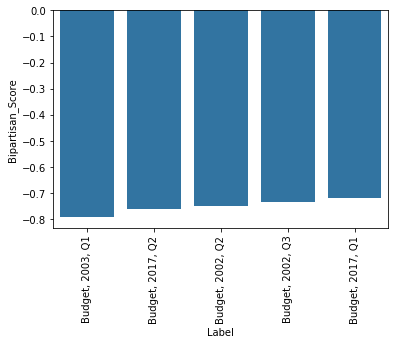

In [487]:
import warnings
warnings.filterwarnings('ignore')
quarter_party_chart = by_quarter_party.sort_values("Bipartisan_Score").reset_index().drop("index", axis=1)
test_chart = quarter_party_chart.iloc[0:5]
test_chart["Label"] = test_chart.apply(lambda row: get_label(row["Committee"], row["Year"], row["Quarter"]), axis=1)
test_chart["Party_Color"] = test_chart.apply(lambda row: get_party_color(row["Party"]), axis=1)
colors = list(test_chart.Party_Color)
ax = sns.barplot(x="Label", y="Bipartisan_Score", hue=colors, data=test_chart)
plt.xticks(rotation=90)
ax.legend_.remove()

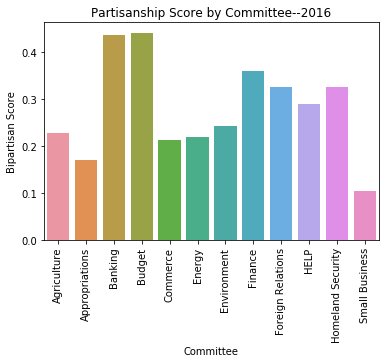

In [511]:
by_year = df.groupby(["Year", "Committee"], as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
df16 = by_year[by_year.Year==2016]
df16["Bipartisan_Score"] = df16.apply(lambda row: -1 * row["Bipartisan_Score"], axis=1)
#df16 = df16.sort_values("Bipartisan_Score")
ax = sns.barplot(x="Committee", y="Bipartisan_Score", data=df16)
plt.xticks(rotation=90)
plt.ylabel("Bipartisan Score")
plt.title("Partisanship Score by Committee--2016")

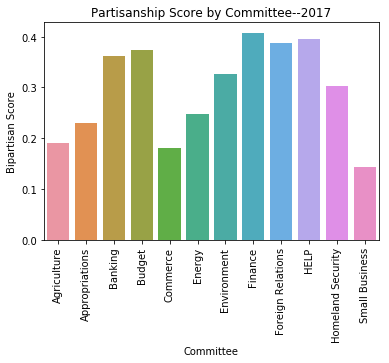

In [518]:
by_year = df.groupby(["Year", "Committee"], as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
df15 = by_year[by_year.Year==2017]
df15["Bipartisan_Score"] = df15.apply(lambda row: -1 * row["Bipartisan_Score"], axis=1)
#df16 = df16.sort_values("Bipartisan_Score")
ax = sns.barplot(x="Committee", y="Bipartisan_Score", data=df15)
plt.xticks(rotation=90)
plt.ylabel("Bipartisan Score")
yticks = np.arange(0, .5, .1)
plt.yticks(yticks)
plt.title("Partisanship Score by Committee--2017");


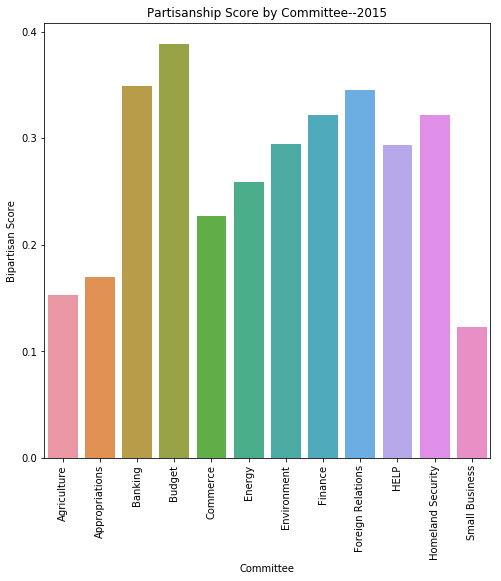

In [575]:
plt.figure(figsize=(8,8))
by_year = df.groupby(["Year", "Committee"], as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
temp = by_year[by_year.Year==2015]
temp["Bipartisan_Score"] = temp.apply(lambda row: -1 * row["Bipartisan_Score"], axis=1)
#df16 = df16.sort_values("Bipartisan_Score")
ax = sns.barplot(x="Committee", y="Bipartisan_Score", data=temp)
plt.xticks(rotation=90)
plt.ylabel("Bipartisan Score")
yticks = np.arange(0, .5, .1)
plt.yticks(yticks)
plt.title("Partisanship Score by Committee--2015");

In [565]:
df.sort_values("Bipartisan_Score").reset_index()

,index,Committee,Date,Day,Label,Month,Party,Release,Title,Year,Bipartisan_Score,Crisis_Score,Quarter
0,7940,Foreign Relations,2011-03-19,19,"Republican, Foreign Relations",3,Republican,Senator Dick Lugar is scheduled to appear on F...,Lugar to appear on CBS Face the Nation,2011,-1.009380,-0.179069,Q1
1,13766,Environment,2012-08-02,2,"Republican, Environment",8,Republican,Contact:\nMatt Dempsey Matt_Dempsey@epw.senate...,Inhofe Exposes Another Epic Fail by Global War...,2012,-0.986150,-0.319656,Q3
2,13782,Environment,2012-07-11,11,"Republican, Environment",7,Republican,Contact:\nMatt Dempsey Matt_Dempsey@epw.senate...,WATCH Inhofe Speech: Cooling Down the Rhetoric...,2012,-0.940128,-0.303288,Q3
3,13783,Environment,2012-07-11,11,"Republican, Environment",7,Republican,Contact:\nMatt Dempsey Matt_Dempsey@epw.senate...,WATCH Inhofe Speech: Cooling Down the Rhetoric...,2012,-0.940128,-0.303288,Q3
4,5082,Finance,2016-11-30,30,"Republican, Finance",11,Republican,WASHINGTON – Senate Finance Committee Chairman...,Hatch Statement at Finance Committee Executive...,2016,-0.922533,-0.150987,Q4
5,8291,HELP,2017-02-01,1,"Democratic, HELP",2,Democratic,Republicans jam Price nomination through Finan...,"Murray on Republicans’ Secret, Closed-Door Vot...",2017,-0.907460,-0.071751,Q1
6,13770,Environment,2012-07-30,30,"Republican, Environment",7,Republican,Posted by Matt Dempsey matt_dempsey@epw.senate...,Inhofe Welcomes Senate Floor Debate on Global ...,2012,-0.891084,-0.238673,Q3
7,5033,Finance,2017-02-09,9,"Republican, Finance",2,Republican,"Utah Senator Says, “Dr. Price is an exceptiona...",Hatch Calls on Colleagues to Confirm Price to ...,2017,-0.880122,-0.125068,Q1
8,9061,HELP,2013-01-25,25,"Democratic, HELP",1,Democratic,"WASHINGTON--Today, Senator Tom Harkin (D-IA), ...",Harkin Statement on Circuit Court Ruling on NL...,2013,-0.877333,-0.023099,Q1
9,13914,Environment,2011-12-12,12,"Republican, Environment",12,Republican,Contacts:\nMatt Dempsey Matt_Dempsey@epw.senat...,Inhofe Accepts Nader's Challenge to Debate Rep...,2011,-0.869881,-0.161109,Q4


^^order this

In [500]:
def get_partisanship_scores_year(dataf, year):
    temp = dataf.groupby(["Year", "Committee"], as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
    temp = temp[temp.Year == year]
    temp["Bipartisan_Score"] = temp.apply(lambda row: -1 * row["Bipartisan_Score"], axis=1)
    ax = sns.barplot(x="Committee", y="Bipartisan_Score", data=temp)
    plt.xticks(rotation=90)
    plt.ylabel("Bipartisan Score")
    plt.title("Partisanship Score by Committee--2016")


get_partisanship_scores_year(df, 2017)

In [534]:
x = df.sort_values("Bipartisan_Score", ascending=False).reset_index().drop("index", axis=1)

In [541]:
x[x.Title.str.contains("Bipartisan")].reset_index().iloc[1]["Bipartisan_Score"]

0.32900494710831574

In [567]:
years = range(2012, 2018)
committees = list(year_scores.Committee.unique())
year_rankings = defaultdict(list)
rows = list()
for year in years:
    temp = year_scores[year_scores.Year == year].sort_values("Bipartisan_Score").reset_index().drop("index", axis=1)
    for comm in committees:
        try:
            num = temp.index[temp.Committee == comm].tolist()[0]
            year_rankings[comm].append(num)
        except:
            year_rankings[comm].append(None)

In [561]:
year_rankings

defaultdict(list,
            {'Agriculture': [8, 9, 9, 10, 7, 9],
             'Appropriations': [None, None, 11, 9, 10, 8],
             'Banking': [9, 4, 7, 1, 1, 4],
             'Budget': [0, 0, 0, 0, 0, 3],
             'Commerce': [6, 7, 5, 8, 9, 10],
             'Energy': [5, 8, 8, 7, 8, 7],
             'Environment': [2, 1, 1, 5, 6, 5],
             'Finance': [1, 2, 3, 4, 2, 0],
             'Foreign Relations': [3, 3, 2, 2, 4, 2],
             'HELP': [4, 5, 4, 6, 5, 1],
             'Homeland Security': [7, 6, 6, 3, 3, 6],
             'Small Business': [10, 10, 10, 11, 11, 11]})

In [568]:
rows = list()
for arr in year_rankings.items():
    row = [arr[0], arr[1][0], arr[1][1], arr[1][2], arr[1][3], arr[1][4], arr[1][5]]
    rows.append(row)
    
year_rankings_df = pd.DataFrame(rows, columns=["Committee", "2012", "2013", "2014", "2015", "2016", "2017"])
year_rankings_df

,Committee,2012,2013,2014,2015,2016,2017
0,Agriculture,8.0,9.0,9,10,7,9
1,Appropriations,NaN,NaN,11,9,10,8
2,Banking,9.0,4.0,7,1,1,4
3,Budget,0.0,0.0,0,0,0,3
4,Commerce,6.0,7.0,5,8,9,10
5,Energy,5.0,8.0,8,7,8,7
6,Environment,2.0,1.0,1,5,6,5
7,Finance,1.0,2.0,3,4,2,0
8,Foreign Relations,3.0,3.0,2,2,4,2
9,HELP,4.0,5.0,4,6,5,1


Consistently among the most partisan--Budget, Foreign Relations, Finance, Environment, HELP

Consistently among the least partisan--Small Business, Appropriations, Agriculture, Commerce

Varies -- Energy, Homeland Security, Banking

In [577]:
df.groupby("Year", as_index=False).agg({"Bipartisan_Score": np.mean})

,Year,Bipartisan_Score
0,2001,-0.557051
1,2002,-0.578051
2,2003,-0.532818
3,2005,-0.502067
4,2006,-0.522725
5,2007,-0.307482
6,2008,-0.300303
7,2009,-0.292623
8,2010,-0.283325
9,2011,-0.343765


Different Topics, Highly Partisan--Budget, Finance

Same Topics, Highly Partisan

Different Topics, Low Partisan--Agriculture, Appropriations, Commerce

Same Topics, Low Partisan--Small Business, Energy

In [576]:
committees

['Agriculture',
 'Appropriations',
 'Banking',
 'Budget',
 'Commerce',
 'Energy',
 'Environment',
 'Finance',
 'Foreign Relations',
 'HELP',
 'Homeland Security',
 'Small Business']

In [600]:
dems = df.groupby(["Party", "Year", "Quarter"], as_index=False).agg({"Bipartisan_Score": np.mean})
dems = dems[(dems.Year > 2011) & (dems.Party == "Democratic")]
gop = df.groupby(["Party", "Year", "Quarter"], as_index=False).agg({"Bipartisan_Score": np.mean})
gop  = gop[(gop.Year > 2011) & (gop.Party == "Republican")]

dem_scores = list(dems.Bipartisan_Score)
gop_scores = list(gop.Bipartisan_Score)
x_plot = range(1,25)
plt.plot(x_plot, dem_scores, color="b")
plt.plot(x_plot, gop_scores, color="r")

In [773]:
mask = (df.Year == 2012) & (df.Party=="Republican")
temp = df[mask]
temp.groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean}).sort_values("Bipartisan_Score")

,Committee,Bipartisan_Score
1,Budget,-0.547920
4,Environment,-0.498611
5,Finance,-0.482477
6,Foreign Relations,-0.395026
7,HELP,-0.384059
3,Energy,-0.360011
2,Commerce,-0.314616
0,Agriculture,-0.311438
8,Homeland Security,-0.280160
9,Small Business,-0.154722


In [774]:
mask = (df.Year == 2012) & (df.Quarter == "Q3") & (df.Party == "Republican")
temp = df[mask].groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
temp.rename(columns={"Day": "Count"}, inplace=True)
temp.sort_values("Bipartisan_Score")


,Committee,Bipartisan_Score,Count
2,Commerce,-0.544253,4
4,Environment,-0.510260,30
5,Finance,-0.461731,58
1,Budget,-0.454347,22
6,Foreign Relations,-0.395026,2
7,HELP,-0.381890,10
3,Energy,-0.291290,17
0,Agriculture,-0.286755,12
8,Homeland Security,-0.279232,16


In [710]:
overall_top4 = defaultdict()
years = range(2012, 2018)
quarters = ["Q1", "Q2", "Q3", "Q4"]
for year in years:
    for quarter in quarters:
        mask = (df.Year == year) & (df.Quarter == quarter)
        temp = df[mask].groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
        temp.rename(columns={"Day": "Count"}, inplace=True)
        ranked = temp.sort_values("Bipartisan_Score")
        k = str(year) + ", " + quarter
        overall_top4[k] = list(ranked.iloc[:4]["Committee"])
        
rows = list()
for arr in list(overall_top4.items()):
    
    row = [arr[0], arr[1][0], arr[1][1], arr[1][2], arr[1][3], "All"]
    rows.append(row)
    
four_most_partisan_df = pd.DataFrame(rows, columns=["Quarter", 1, 2, 3, 4, "Category"])
#four_most_partisan_df

In [711]:
gop_top4 = defaultdict()
years = range(2012, 2018)
quarters = ["Q1", "Q2", "Q3", "Q4"]
for year in years:
    for quarter in quarters:
        mask = (df.Year == year) & (df.Quarter == quarter) & (df.Party == "Republican")
        temp = df[mask].groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
        temp.rename(columns={"Day": "Count"}, inplace=True)
        ranked = temp.sort_values("Bipartisan_Score")
        k = str(year) + ", " + quarter
        gop_top4[k] = list(ranked.iloc[:4]["Committee"])
        
rows = list()
for arr in list(gop_top4.items()):
    
    row = [arr[0], arr[1][0], arr[1][1], arr[1][2], arr[1][3], "Republican"]
    rows.append(row)
    
gop_most_partisan_df = pd.DataFrame(rows, columns=["Quarter", 1, 2, 3, 4, "Category"])

In [719]:
dem_top4 = defaultdict()
years = range(2012, 2018)
quarters = ["Q1", "Q2", "Q3", "Q4"]
for year in years:
    for quarter in quarters:
        mask = (df.Year == year) & (df.Quarter == quarter) & (df.Party == "Democratic")
        temp = df[mask].groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
        temp.rename(columns={"Day": "Count"}, inplace=True)
        ranked = temp.sort_values("Bipartisan_Score")
        k = str(year) + ", " + quarter
        dem_top4[k] = list(ranked.iloc[:4]["Committee"])
        
rows = list()
for arr in list(dem_top4.items()):
    
    row = [arr[0], arr[1][0], arr[1][1], arr[1][2], arr[1][3], "Democratic"]
    rows.append(row)
    
dem_most_partisan_df = pd.DataFrame(rows, columns=["Quarter", 1, 2, 3, 4, "Category"])
#dem_most_partisan_df

In [713]:
gop_most_partisan_df.head()

,Quarter,1,2,3,4,Category
0,"2012, Q1",Budget,Environment,HELP,Energy,Republican
1,"2012, Q2",Budget,Environment,Finance,HELP,Republican
2,"2012, Q3",Commerce,Environment,Finance,Budget,Republican
3,"2012, Q4",Environment,Budget,Finance,HELP,Republican
4,"2013, Q1",Budget,Environment,Banking,Finance,Republican


In [714]:
four_most_partisan_df.head()

,Quarter,1,2,3,4,Category
0,"2012, Q1",Budget,Environment,Foreign Relations,HELP,All
1,"2012, Q2",Budget,Finance,Environment,Foreign Relations,All
2,"2012, Q3",Finance,Budget,Environment,Foreign Relations,All
3,"2012, Q4",Budget,Finance,Environment,Foreign Relations,All
4,"2013, Q1",Budget,Finance,Environment,Banking,All


In [723]:
arr = [four_most_partisan_df, gop_most_partisan_df, dem_most_partisan_df]
partisan_top4 = pd.concat(arr)


In [701]:
mask = (df.Year == 2017) & (df.Quarter == "Q4")
temp = df[mask].groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean, "Day": len})
temp.rename(columns={"Day": "Count"}, inplace=True)
temp.sort_values("Bipartisan_Score")

,Committee,Bipartisan_Score,Count
7,Finance,-0.412878,91
9,HELP,-0.387513,93
8,Foreign Relations,-0.379271,45
2,Banking,-0.361954,17
6,Environment,-0.346987,43
3,Budget,-0.341689,8
10,Homeland Security,-0.298362,52
5,Energy,-0.271158,42
0,Agriculture,-0.267154,22
1,Appropriations,-0.189097,21


In [762]:
partisan_top4[partisan_top4.Quarter == "2012, Q1"]

,Quarter,1,2,3,4,Category
22,"2017, Q3",Banking,Finance,Budget,Foreign Relations,All
22,"2017, Q3",Budget,Finance,Homeland Security,Foreign Relations,Republican
22,"2017, Q3",Banking,Finance,HELP,Foreign Relations,Democratic


In [769]:
release_counts = df.groupby(["Committee", "Party", "Year", "Quarter"], as_index=False).agg({"Day":len})
release_counts.rename(columns={"Day": "Count"}, inplace=True)
mask = (release_counts.Year == 2012) & (release_counts.Quarter == "Q3")
temp = release_counts[mask].sort_values("Count", ascending=False)
temp[temp.Party=="Republican"]

,Committee,Party,Year,Quarter,Count
410,Finance,Republican,2012,Q3,58
368,Environment,Republican,2012,Q3,30
201,Budget,Republican,2012,Q3,22
305,Energy,Republican,2012,Q3,17
626,Homeland Security,Republican,2012,Q3,16
34,Agriculture,Republican,2012,Q3,12
562,HELP,Republican,2012,Q3,10
252,Commerce,Republican,2012,Q3,4
476,Foreign Relations,Republican,2012,Q3,2


In [649]:
years = range(2012, 2018)
for year in years:
    temp = df[df.Year == year]
    temp = temp.groupby(["Committee"], as_index=False).agg({"Bipartisan_Score": np.mean})
    print(year)
    print(temp.sort_values("Bipartisan_Score"))
    

2012
            Committee  Bipartisan_Score
2              Budget         -0.546312
6             Finance         -0.482477
5         Environment         -0.414299
7   Foreign Relations         -0.412482
8                HELP         -0.352597
4              Energy         -0.315883
3            Commerce         -0.302837
9   Homeland Security         -0.298958
0         Agriculture         -0.271684
1             Banking         -0.234410
10     Small Business         -0.099810
2013
            Committee  Bipartisan_Score
2              Budget         -0.539912
5         Environment         -0.396760
6             Finance         -0.375953
7   Foreign Relations         -0.369873
1             Banking         -0.339128
8                HELP         -0.323304
9   Homeland Security         -0.306737
3            Commerce         -0.299097
4              Energy         -0.289862
0         Agriculture         -0.227094
10     Small Business         -0.139073
2014
            Committee  Bi

In [625]:
x = df.groupby(["Committee", "Year", "Month"], as_index=False).agg({"Bipartisan_Score": np.mean})
test = x[x.Year>2011].sort_values("Bipartisan_Score")
test[test.Committee == "HELP"]

,Committee,Year,Month,Bipartisan_Score
885,HELP,2012,8,-0.472460
939,HELP,2017,2,-0.471965
890,HELP,2013,1,-0.449883
938,HELP,2017,1,-0.442568
944,HELP,2017,7,-0.436285
943,HELP,2017,6,-0.432378
886,HELP,2012,9,-0.421933
940,HELP,2017,3,-0.411027
888,HELP,2012,11,-0.405324
879,HELP,2012,2,-0.404612


In [627]:
df[df.Committee == "Small Business"].groupby("Year").agg({"Bipartisan_Score": np.mean})

,Bipartisan_Score
Year,
2007,-0.125918
2008,-0.200273
2009,-0.130543
2010,-0.166893
2011,-0.204772
2012,-0.099810
2013,-0.139073
2014,-0.115720
2015,-0.122611


In [646]:
com_ranges = defaultdict()
for c in committees[0:1]:
    temp = df[df.Committee == c].groupby(["Committee", "Year", "Quarter"], as_index=False).agg({"Bipartisan_Score": np.mean})
    temp = temp[temp.Year > 2011]
    print(temp)
    scores = list(temp.Bipartisan_Score)
    cur_range = abs(min(scores)) - abs(max(scores))
    print(min(scores))
    com_ranges[c] = cur_range
    
#com_ranges

      Committee  Year Quarter  Bipartisan_Score
4   Agriculture  2012      Q1         -0.300506
5   Agriculture  2012      Q2         -0.232229
6   Agriculture  2012      Q3         -0.290341
7   Agriculture  2012      Q4         -0.279411
8   Agriculture  2013      Q1         -0.218882
9   Agriculture  2013      Q2         -0.191720
10  Agriculture  2013      Q3         -0.284929
11  Agriculture  2013      Q4         -0.186675
12  Agriculture  2014      Q1         -0.107242
13  Agriculture  2014      Q2         -0.191831
14  Agriculture  2014      Q3         -0.097532
15  Agriculture  2014      Q4         -0.168222
16  Agriculture  2015      Q1         -0.131317
17  Agriculture  2015      Q2         -0.144118
18  Agriculture  2015      Q3         -0.152117
19  Agriculture  2015      Q4         -0.183310
20  Agriculture  2016      Q1         -0.205066
21  Agriculture  2016      Q2         -0.197318
22  Agriculture  2016      Q3         -0.219262
23  Agriculture  2016      Q4         -0

In [644]:
com_ranges

defaultdict(None, {'Agriculture': 0.25207737805418406})

In [792]:
df.groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean}).sort_values("Bipartisan_Score")

,Committee,Bipartisan_Score
3,Budget,-0.493706
7,Finance,-0.373867
8,Foreign Relations,-0.357468
6,Environment,-0.338737
2,Banking,-0.338145
9,HELP,-0.328127
10,Homeland Security,-0.314511
5,Energy,-0.272220
4,Commerce,-0.247620
0,Agriculture,-0.204711


In [790]:
quarter_scores = df.groupby(["Committee", "Year", "Quarter"], as_index=False).agg({"Bipartisan_Score": np.mean})

quarter_scores[quarter_scores.Committee == "Agriculture"].sort_values("Bipartisan_Score").reset_index().drop("index", axis=1)

,Committee,Year,Quarter,Bipartisan_Score
0,Agriculture,2011,Q4,-0.400483
1,Agriculture,2016,Q4,-0.349609
2,Agriculture,2012,Q1,-0.300506
3,Agriculture,2012,Q3,-0.290341
4,Agriculture,2013,Q3,-0.284929
5,Agriculture,2012,Q4,-0.279411
6,Agriculture,2017,Q4,-0.267154
7,Agriculture,2011,Q1,-0.251846
8,Agriculture,2012,Q2,-0.232229
9,Agriculture,2016,Q3,-0.219262


In [795]:
df.groupby("Committee", as_index=False).agg({"Bipartisan_Score": np.mean}).sort_values("Bipartisan_Score")

,Committee,Bipartisan_Score
3,Budget,-0.493706
7,Finance,-0.373867
8,Foreign Relations,-0.357468
6,Environment,-0.338737
2,Banking,-0.338145
9,HELP,-0.328127
10,Homeland Security,-0.314511
5,Energy,-0.272220
4,Commerce,-0.247620
0,Agriculture,-0.204711


In [825]:
comm_scores = df.groupby("Committee", as_index=False).agg({"Partisan_Score": np.mean})
comm_scores = comm_scores.sort_values("Partisan_Score")

In [855]:
pd.set_option("display.max_rows", 300)

In [857]:
temp = df[df.Year > 2011]
temp = temp.groupby(["Year", "Quarter", "Committee"], as_index=False).agg({"Partisan_Score": np.mean})
x = temp.sort_values("Partisan_Score", ascending=False).reset_index().drop("index", axis=1)
mask = (x.Committee == "Budget") & (x.Year==2016)
x

,Year,Quarter,Committee,Partisan_Score
0,2012,Q1,Budget,0.605072
1,2013,Q4,Budget,0.584372
2,2012,Q2,Budget,0.583083
3,2013,Q3,Budget,0.558044
4,2013,Q1,Budget,0.543456
5,2012,Q4,Budget,0.516946
6,2012,Q2,Finance,0.502204
7,2014,Q1,Budget,0.500442
8,2016,Q3,Budget,0.491737
9,2012,Q4,Finance,0.476912


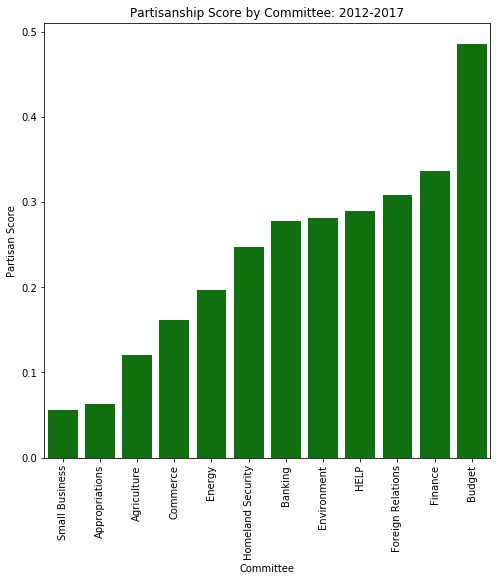

In [1002]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="Committee", y="Partisan_Score", data=comm_scores, color="green")
plt.xticks(rotation=90)
plt.ylabel("Partisan Score")
plt.xlabel("Committee")
plt.title("Partisanship Score by Committee: 2012-2017")

In [878]:
def get_year_quarter(year, quarter):
    return str(year) + ", " + quarter

In [880]:
temp = df[df.Year > 2011]
parties_quarters = temp.groupby(["Party", "Year", "Quarter"], as_index=False).agg({"Partisan_Score": np.mean})
dem_quarters = parties_quarters[parties_quarters.Party == "Democratic"]
rep_quarters = parties_quarters[parties_quarters.Party == "Republican"]
dem_quarters["YQ"] = dem_quarters.apply(lambda row: get_year_quarter(row["Year"], row["Quarter"]), axis=1)
rep_quarters["YQ"] = rep_quarters.apply(lambda row: get_year_quarter(row["Year"], row["Quarter"]), axis=1)

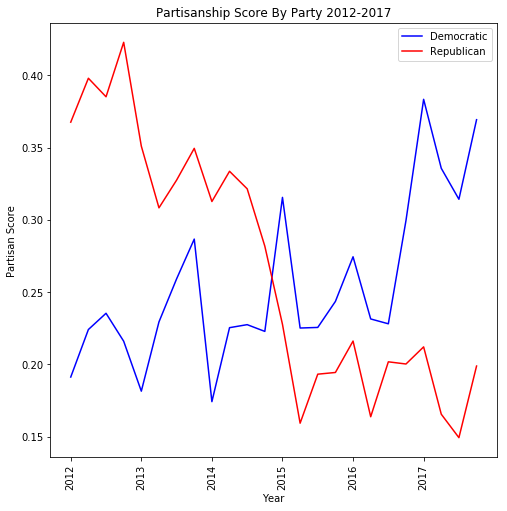

In [1000]:
plt.figure(figsize=(8,8))
plt.plot(range(0,24), list(dem_quarters.Partisan_Score), color="blue", label="Democratic")
plt.plot(range(0,24), list(rep_quarters.Partisan_Score), color="red", label="Republican")
yqs = list(dem_quarters.YQ)
xticks = [yqs[i].split(", ")[0] for i in range(0,24,4)]
plt.xticks(range(0,24, 4), xticks)
plt.xticks(rotation=90)
plt.title("Partisanship Score By Party 2012-2017")
plt.ylabel("Partisan Score")
plt.xlabel("Year")
plt.legend();


## Issue Testing

In [968]:
temp = df[df.Year > 2011]
test_df = temp[temp["Title"].str.contains("ISIS")]

np.mean(list(test_df.Partisan_Score))

0.34889934291419095

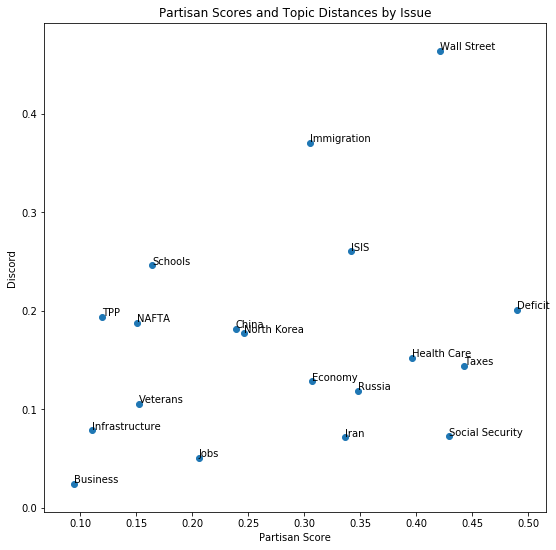

In [997]:
final = defaultdict()
topics = ["Iran", "Russia", "Social Security", "ISIS", "Veterans", "Jobs", "Economy",
         "Taxes", "Health Care", "Schools", "Business", "Climate Change", "North Korea", "NAFTA",
         "TPP", "Infrastructure", "Immigration", "Wall Street", "Deficit", "China"]
for t in topics:
    try:
        test_df = df[df.Title.str.contains(t)] 
        num = np.mean(list(test_df.Partisan_Score))
        final[t] = num
    except:
        final[t] = None
        
rows = list()
for arr in final.items():
    row = [arr[0], arr[1]]
    rows.append(row)


issues_df = pd.DataFrame(rows, columns=["Issue", "Partisan_Score"])

issues_dist = pd.read_pickle("issues_distance.pkl")

issues_comparisons = pd.merge(issues_df, issues_dist, on="Issue")

plt.figure(figsize=(9,9))
x_plot = list(issues_comparisons.Partisan_Score)
y_plot = list(issues_comparisons.Distance)
plt.scatter(x_plot, y_plot)
# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i],y[i]))
issues = list(issues_comparisons.Issue)
for i, issue in enumerate(issues):
    plt.annotate(issue, (x_plot[i], y_plot[i] + .001))
    plt.title("")
plt.xlabel("Partisan Score")
plt.ylabel("Discord")
plt.title("Partisan Scores and Topic Distances by Issue");

### Combined with Topics

In [936]:
topic_dist = pd.read_pickle("committee_distance.pkl")

In [939]:
dist_partisan = topic_dist.merge(comm_scores, on="Committee")

In [940]:
sns

<module 'seaborn' from '/home/dgilberg/anaconda3/lib/python3.6/site-packages/seaborn/__init__.py'>

<function matplotlib.pyplot.annotate>

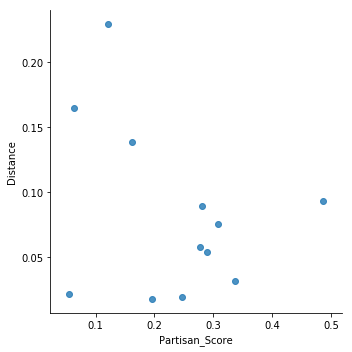

In [947]:
sns.lmplot('Partisan_Score', # Horizontal axis
           'Distance', # Vertical axis
           data=dist_partisan, # Data source
           fit_reg=False, # Don't fix a regression line # Set color
       ) # S marker size


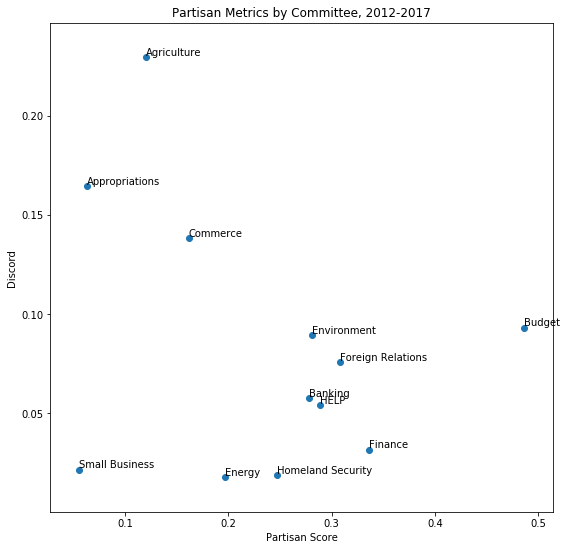

In [998]:
plt.figure(figsize=(9,9))
x_plot = list(dist_partisan.Partisan_Score)
y_plot = list(dist_partisan.Distance)
plt.scatter(x_plot, y_plot)
# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i],y[i]))
committees = list(dist_partisan.Committee)
for i, comm in enumerate(committees):
    plt.annotate(comm, (x_plot[i], y_plot[i] + .001))
    plt.title("")
plt.xlabel("Partisan Score")
plt.ylabel("Discord")
plt.title("Partisan Metrics by Committee, 2012-2017");